<a href="https://colab.research.google.com/github/GuilhermeDumam/Desafio_Conta_Azul/blob/Master/desafio_conta_azul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**INTRODUÇÃO**

O presente notebook busca solucionar um caso de evasão de clientes (churn) e  está divido em seis etapas:


*   Importação das bibliotecas e dataset
*   Tratamento e limpeza dos dados
*   EDA / Análise exploratória dos dados
*   Feature Engineering
*   Modelagem
*   Recomendação



##IMPORTAÇÃO BIBLIOTECAS e DATASET

Nessa etapa nós iremos importar o dataset que se encontra no link abaixo. 

Importaremos as principais bibliotecas que iremos utilizar nas primeiras etapas do nosso case técnico.

##Base de dados (refined)

https://drive.google.com/file/d/1ho2N_WCj7J4nG8MCVQP2olWyb1dl7h7V/view?usp=sharing

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [170]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import plotly           
import pandas as pd
import numpy as np
import random

In [2]:
from pandas_profiling import ProfileReport

In [3]:
from scipy import stats

In [525]:
df = pd.read_csv(('/content/customer_churn_data1.csv'), sep=';',decimal=',')

O decimal virá em vírgula (,) para adequarmos ao padrão de leitura do Python.

#**Tratamento**

Aqui vamos limpar e tratar os dados para que eles estejam aptos de serem explorados.

In [526]:
df.head()

,ID,Tipo de empresa,Fundação da empresa,Possui mais de um sócio,Funcionários,Meses de permanência,Utiliza serviços financeiros,PossuiContador,Faz conciliação bancária,Frequência de utilização de feature do sistema: Módulo financeiro,Frequência de utilização de feature do sistema: Emissão de nota fiscal,Frequência de utilização de feature do sistema: Integração bancária,Frequência de utilização de feature do sistema: Módulo de vendas,Frequência de utilização de feature do sistema: Relatórios,Frequência de utilização de feature do sistema: Utilização de APIs de integração,Contrato,Emite boletos,Emite boletos.1,Tipo de pagamento,Receita mensal,Receita total,Churn
0,1,Micro empresa,2016,Sim,até 5 funcionários,1,Não,NaN,automática,Pouco uso,Uso frequente,Pouco uso,Pouco uso,Pouco uso,Pouco uso,Mês-a-mês,1,Yes,Boleto - pagamento único,29.85,29.85,Não
1,2,Pequena empresa,2018,Não,até 5 funcionários,34,Sim,Não,automática,Uso frequente,Pouco uso,Uso frequente,Pouco uso,Pouco uso,Pouco uso,Trimestral,0,No,Boleto - mês a mês,56.95,1889.50,Não
2,3,Pequena empresa,2021,Não,até 5 funcionários,2,Sim,Não,automática,Uso frequente,Uso frequente,Pouco uso,Pouco uso,Pouco uso,Pouco uso,Mês-a-mês,1,Yes,Boleto - mês a mês,53.85,108.15,Sim
3,4,Pequena empresa,2016,Não,até 5 funcionários,45,Não,NaN,automática,Uso frequente,Pouco uso,Uso frequente,Uso frequente,Pouco uso,Pouco uso,Trimestral,0,No,Cartão de crédito - pagamento único,42.30,1840.75,Não
4,5,Micro empresa,2017,Não,até 5 funcionários,2,Sim,Não,manual,Pouco uso,Pouco uso,Pouco uso,Pouco uso,Pouco uso,Pouco uso,Mês-a-mês,1,Yes,Boleto - pagamento único,70.70,151.65,Sim


In [ ]:
df.columns

In [527]:
#Padronização das colunas para linguagem natural.
columns_renamed = {
    'Tipo de empresa': 'tipo_de_empresa', 
    'Tipo de empresa': 'tipo_de_empresa', 
    'Fundação da empresa': 'fundacao_da_empresa', 
    'Possui mais de um sócio': 'possui_mais_de_um_socio', 
    'Funcionários': 'funcionarios',
    'Meses de permanência ': 'meses_de_permanencia', 
    'Utiliza serviços financeiros': 'utiliza_servicos_financeiros',
    'PossuiContador': 'possui_contador', 
    'Faz conciliação bancária': 'faz_conciliacao_bancaria', 
    'Frequência de utilização de feature do sistema: Módulo financeiro': 'frequencia_de_utilizacao_modulo_financeiro', 
    'Frequência de utilização de feature do sistema: Emissão de nota fiscal': 'frequencia_de_utilizacao_sistema_emissao_de_nota_fiscal',
    'Frequência de utilização de feature do sistema: Integração bancária': 'frequencia_de_utilizacao_integracao_bancaria',
    'Frequência de utilização de feature do sistema: Módulo de vendas': 'frequencia_de_utilizacao_modulo_de_vendas',
    'Frequência de utilização de feature do sistema: Relatórios': 'frequencia_de_utilizacao_sistema_relatorios',
    'Frequência de utilização de feature do sistema: Utilização de APIs de integração': 'frequencia_de_utilizacao_sistema_de_apis_de_integracao',
    'Contrato': 'contrato',
    'Emite boletos': 'emite_boletos',
    'Emite boletos.1': 'emite_boletos_1',
    'Tipo de pagamento': 'tipo_de_pagamento',
    'Receita mensal': 'receita_mensal',
    'Receita total': 'receita_total',
    'Churn': 'churn'
}
df.rename(columns=columns_renamed, inplace=True)

In [532]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   tipo_de_empresa                                          7043 non-null   object 
 1   fundacao_da_empresa                                      7043 non-null   int64  
 2   possui_mais_de_um_socio                                  7043 non-null   object 
 3   funcionarios                                             7043 non-null   object 
 4   meses_de_permanencia                                     7043 non-null   int64  
 5   utiliza_servicos_financeiros                             7043 non-null   object 
 6   possui_contador                                          7043 non-null   object 
 7   faz_conciliacao_bancaria                                 7043 non-null   object 
 8   frequencia_de_utilizacao_mod

(7043, 20)

Temos 20 colunas, em sua maioria com variáveis categóricas; vamos precisar pensar no que fazer com elas para nosso modelo.

In [ ]:
df[df.duplicated()].count()

In [ ]:
df.isna().sum()/df.shape[0]

In [528]:
df['possui_contador'].fillna(df['possui_contador'].mode()[0], inplace=True)

In [529]:
df['receita_total'].fillna(df['receita_mensal'], inplace=True)

In [530]:
df.drop(columns=['ID'], inplace=True)

In [531]:
df.drop(columns = ['emite_boletos_1'], inplace = True)

Dropamos o 'ID' e a coluna extra de emissão de boletos pois ambos não fariam sentido para nossa análise, já que o ID não passava de numerador de linhas e a coluna extra de boleto tem valores binários similares aos da coluna de boletos restante, então, por que ficar com mais de uma coluna com os mesmos valores? 

####Abaixo nós transformamos as variáveis categóricas com apenas duas variáveis em valores binários (0,1), para facilitar na hora de inputarmos no modelo. 

In [533]:
df.loc[df.churn == 'Não', 'churn'] = 0
df.loc[df.churn == 'Sim', 'churn'] = 1

In [534]:
df['churn'] = df['churn'].astype(int)

In [535]:
df.loc[df.possui_mais_de_um_socio == 'Não', 'possui_mais_de_um_socio'] = 0
df.loc[df.possui_mais_de_um_socio == 'Sim', 'possui_mais_de_um_socio'] = 1

In [536]:
df['possui_mais_de_um_socio'] = df['possui_mais_de_um_socio'].astype(int)

In [537]:
df.loc[df.utiliza_servicos_financeiros == 'Não', 'utiliza_servicos_financeiros'] = 0
df.loc[df.utiliza_servicos_financeiros == 'Sim', 'utiliza_servicos_financeiros'] = 1

In [538]:
df['utiliza_servicos_financeiros'] = df['utiliza_servicos_financeiros'].astype(int)

In [539]:
df.loc[df.possui_contador == 'Não', 'possui_contador'] = 0
df.loc[df.possui_contador == 'Não ', 'possui_contador'] = 0
df.loc[df.possui_contador == 'Sim', 'possui_contador'] = 1

In [540]:
df['possui_contador'] = df['possui_contador'].astype(int)

In [541]:
df.loc[df.possui_mais_de_um_socio == 'Não', 'possui_mais_de_um_socio'] = 0
df.loc[df.possui_mais_de_um_socio == 'Sim', 'possui_mais_de_um_socio'] = 1

In [542]:
df['possui_mais_de_um_socio'] = df['possui_mais_de_um_socio'].astype(int)

In [543]:
df.loc[df.tipo_de_empresa == 'Micro empresa', 'tipo_de_empresa'] = 0
df.loc[df.tipo_de_empresa == 'Pequena empresa', 'tipo_de_empresa'] = 1

In [544]:
df['tipo_de_empresa'] = df['tipo_de_empresa'].astype(int)

In [545]:
df.loc[df.funcionarios == 'até 5 funcionários', 'funcionarios'] = 0
df.loc[df.funcionarios == '6 ou mais funcionários', 'funcionarios'] = 1

In [546]:
df['funcionarios'] = df['funcionarios'].astype(int)

#**EDA**

Nessa etapa vamos tentar extrair do nosso conjunto de dados, informações relevantes ao seu comportamento, do ponto de vista estatístico e de negócios; utilizando ferramentas estatística e de vizualização (gráficos, tabelas).


In [ ]:
df.describe()

In [ ]:
df.head()

In [320]:
#profile = ProfileReport(
    #df, title='Profile_EDA', html={'style': {'full_width': True}}, sort=None)

In [ ]:
#profile.to_notebook_iframe()

Utilizar o 'profilereport' é uma boa alternativa quando você já quer algumas informações sobre o seu conjunto de dados.

## Avaliação de Distribuições e Densidade


In [547]:
df['churn'].value_counts()

0    5174
1    1869
Name: churn, dtype: int64

Nosso dataset se encontra bem desbalanceado.

Text(0.5, 1.0, 'Distribuição do Churn')

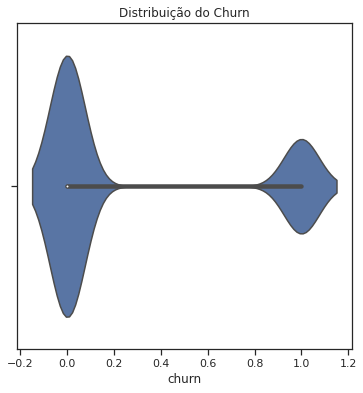

In [548]:
plt.figure(figsize = (6,6))
sns.violinplot(df.churn)
plt.title('Distribuição do Churn')

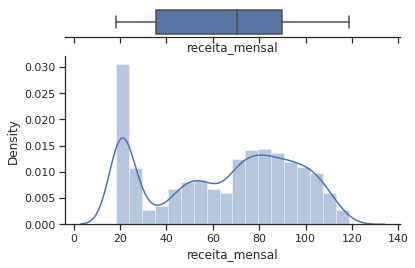

In [549]:
sns.set(style="ticks")

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(data= df, x='receita_mensal', ax=ax_box)
sns.distplot(df['receita_mensal'], ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

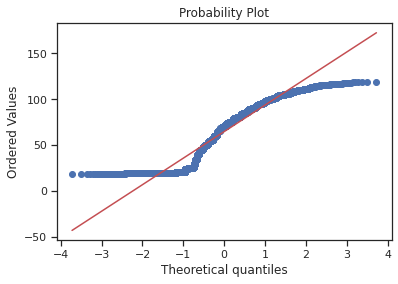

In [550]:
res = stats.probplot(df['receita_mensal'], plot = plt)

In [551]:
numeric_var = ['fundacao_da_empresa', 'meses_de_permanencia', 'receita_mensal', 'receita_total']

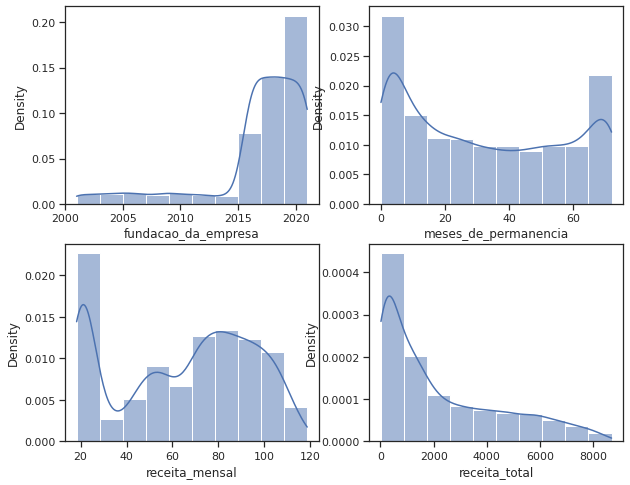

In [552]:
# Olhando a distribuição para todas as variaveis numéricas
n_rows=2
n_cols=2
# Create the subplots
fig, axes = plt.subplots(nrows = n_rows, ncols=n_cols)
fig.set_size_inches(10, 8)

for i, (ax, column) in enumerate(zip(axes.flatten(), numeric_var)):
  sns.histplot(df[column], ax=axes[i//n_cols][i%n_cols], bins=10, stat="density", kde=True) 

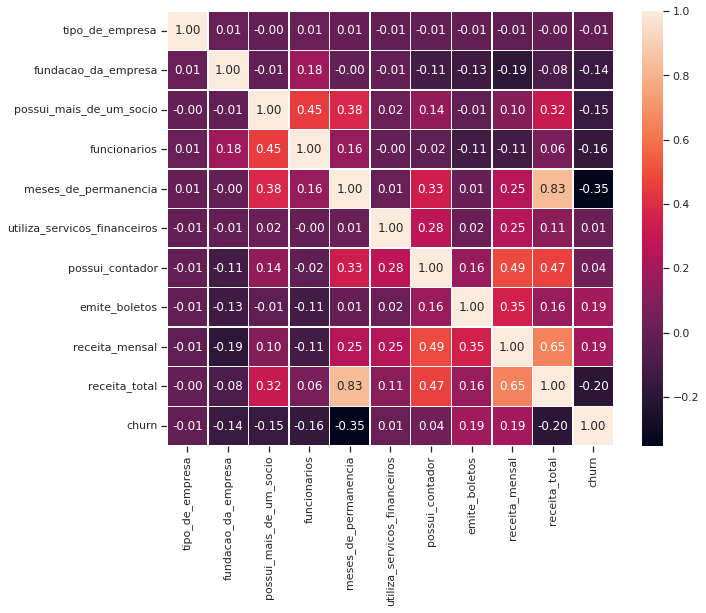

In [553]:
#Todas variáveis
corr_var = df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(data = corr_var, linewidths=.5, annot=True,  fmt=".2f")

Com essa tabela de correlação, podemos ter uma ideia de quais variáveis se correlacionam.

De acordo com a definição para correlaçao de Pearson: 0.7 a 0.9 positivo ou negativo indica uma correlação forte. 0.5 a 0.7 positivo ou negativo indica uma correlação moderada. 0.3 a 0.5 positivo ou negativo indica uma correlação fraca. 0 a 0.3 positivo ou negativo indica uma correlação desprezível.

Temos apenas uma forte correlação que é entre receita total e os meses de permanência.



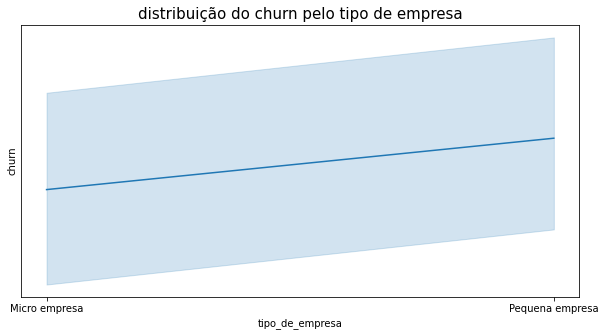

In [338]:
plt.figure(figsize=(10,5))
plt.title("distribuição do churn pelo tipo de empresa", fontsize=15)
lines = ['churn']
for line in lines:
    ax = sns.lineplot(x='tipo_de_empresa', y=line, data=df)

Podemos ver que pequenas empresas tendem ao churn mais que as micro empresas, por quê? Com o modelo nós levantamos uma resposta. 

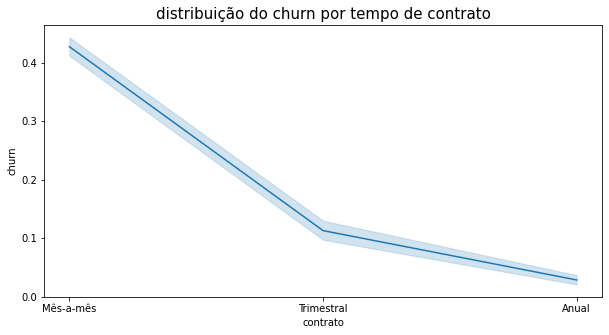

In [366]:
plt.figure(figsize=(10,5))
plt.title("distribuição do churn por tempo de contrato", fontsize=15)
lines = ['churn']
for line in lines:
    ax = sns.lineplot(x='contrato', y=line, data=df)

Há fortes indícios que se a empresa tem contratos com prazos mais longos, ela tende ao 'Não churn'.

In [554]:
media_por_ano = df[['fundacao_da_empresa', 'meses_de_permanencia', 'receita_mensal', 'receita_total']].groupby('fundacao_da_empresa').mean().sort_values(by='fundacao_da_empresa').reset_index()
media_por_ano.head()

,fundacao_da_empresa,meses_de_permanencia,receita_mensal,receita_total
0,2001,32.211765,75.657647,2557.699412
1,2002,29.057143,83.636429,2665.356429
2,2003,28.050633,77.804430,2360.703165
3,2004,34.537500,74.618750,2638.096250
4,2005,35.045977,82.882184,3017.472414


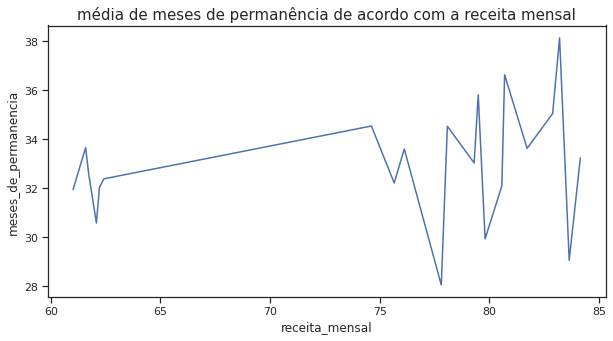

In [557]:
plt.figure(figsize=(10,5))
plt.title("média de meses de permanência de acordo com a receita mensal", fontsize=15)
lines = ['meses_de_permanencia']
for line in lines:
    ax = sns.lineplot(x='receita_mensal', y=line, data=media_por_ano)

Há um descompasso no tempo permanência conforme a receita mensal aumenta, pode ser que as empresas mudem para a concorrência porque nossos serviços não são mais vantajosos para o momento da empresa. Vamos confirmar com o modelo.

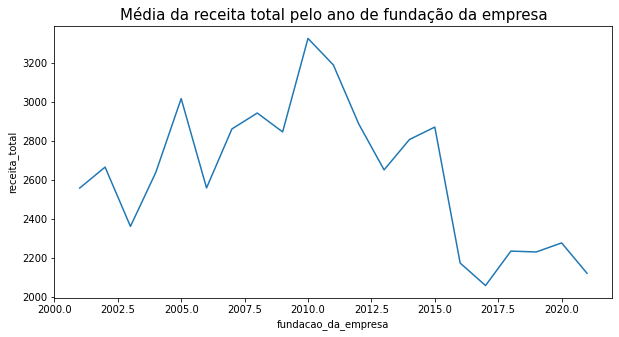

In [374]:
plt.figure(figsize=(10,5))
plt.title("Média da receita total pelo ano de fundação da empresa", fontsize=15)
lines = ['receita_total']
for line in lines:
    ax = sns.lineplot(x='fundacao_da_empresa', y=line, data=media_por_ano)

É provável que as receitas maiores (2010 - 2012) se deu pelo momento econômico do País e as receitas mais baixas (2015 - 2020) se deu pela crise política e econômica e, mais recente, a pandemia.

####Teste T para saber se alguns parâmetros influenciam diretamente no Churn


####H0: Não há diferença entre as médias
####H1: Há diferença

In [64]:
import statsmodels.api as sm
import statsmodels.stats.multicomp

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

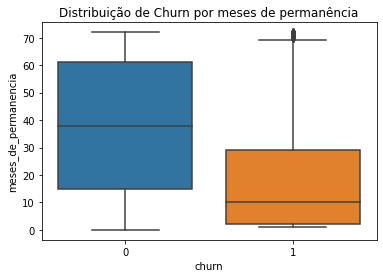

In [65]:
sns.boxplot(x=df.churn, y=df.meses_de_permanencia)
plt.title('Distribuição de Churn por meses de permanência')
plt.show()

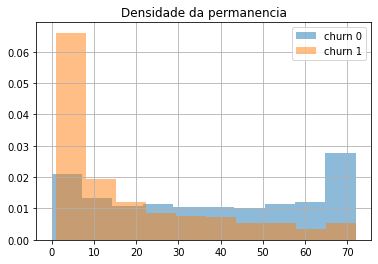

In [376]:
df[df.churn==0]['meses_de_permanencia'].hist(density=True, alpha=0.5)
df[df.churn==1]['meses_de_permanencia'].hist(density=True, alpha=0.5)
plt.legend(['churn 0', 'churn 1'])
plt.title('Densidade da permanencia')
plt.show()

In [69]:
stats.ttest_ind(df[df.churn==0]['meses_de_permanencia'], df[df.churn==1]['meses_de_permanencia'])

Ttest_indResult(statistic=31.569995452928403, pvalue=1.0732933837402176e-204)

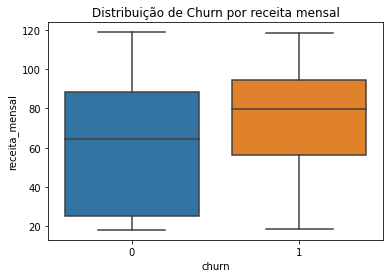

In [70]:
sns.boxplot(x=df.churn, y=df.receita_mensal)
plt.title('Distribuição de Churn por receita mensal')
plt.show()

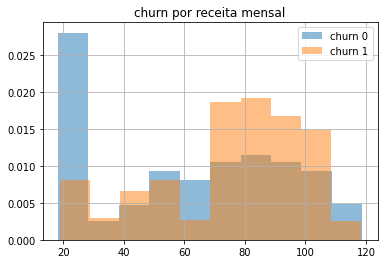

In [375]:
df[df['churn']==0]['receita_mensal'].hist(density=True, alpha=0.5)
df[df['churn']==1]['receita_mensal'].hist(density=True, alpha=0.5)
plt.legend(['churn 0', 'churn 1'])
plt.title('churn por receita mensal')
plt.show()

In [43]:
stats.ttest_ind(df[df.churn==0]['receita_mensal'], df[df.churn==1]['receita_mensal'])

Ttest_indResult(statistic=-16.55017772823186, pvalue=2.189014556607605e-60)

Ao rodarmos o teste estatístico T (teste de hipóteses), conseguimos inferir que o churn está diretamente ligado as maiores receitas mensais, e as empresas com mais tempo de contrato, tendem ao 'não churn'.

#**Feature Engineering**

Esta etapa vamos trabalhar emcima de nossas variáveis, sejam elas categóricas ou contínuas, deixando elas prontas para serem features do nosso modelo de machine learning. 

####Tratamento de outliers e 'feature scaling' das variáveis contínuas.

Limpar outliers e escalar as features são boas práticas que ajudam a melhorar o desempenho do nosso modelo.

In [72]:
## Remoção Outlier por IQR
def iqr_remove(df,col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  return df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

In [211]:
df.shape

(7036, 20)

In [213]:
iqr_remove(df,'receita_total').shape

(7036, 20)

In [214]:
iqr_remove(df,'meses_de_permanencia').shape

(7036, 20)

In [215]:
iqr_remove(df,'receita_mensal').shape

(7036, 20)

In [ ]:
print(df.skew())

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [28]:
z_score = StandardScaler()
min_max = MinMaxScaler()
robust = RobustScaler()

In [558]:
df_features = df

In [559]:
df_features.meses_de_permanencia = min_max.fit_transform(df[['meses_de_permanencia']])

In [560]:
df_features.receita_mensal = min_max.fit_transform(df[['receita_mensal']])

In [561]:
df_features.receita_total = min_max.fit_transform(df[['receita_total']])

Foi usado a escala de 'min e máx' pois todas as variáveis contínuas do nosso dataset se encontram sem outliers e com uma boa normalização. Se tivessemos features com outliers, seria melhor outro método de escala.

In [562]:
df_features.head()

,tipo_de_empresa,fundacao_da_empresa,possui_mais_de_um_socio,funcionarios,meses_de_permanencia,utiliza_servicos_financeiros,possui_contador,faz_conciliacao_bancaria,frequencia_de_utilizacao_modulo_financeiro,frequencia_de_utilizacao_sistema_emissao_de_nota_fiscal,frequencia_de_utilizacao_integracao_bancaria,frequencia_de_utilizacao_modulo_de_vendas,frequencia_de_utilizacao_sistema_relatorios,frequencia_de_utilizacao_sistema_de_apis_de_integracao,contrato,emite_boletos,tipo_de_pagamento,receita_mensal,receita_total,churn
0,0,2016,1,0,0.013889,0,0,automática,Pouco uso,Uso frequente,Pouco uso,Pouco uso,Pouco uso,Pouco uso,Mês-a-mês,1,Boleto - pagamento único,0.115423,0.001275,0
1,1,2018,0,0,0.472222,1,0,automática,Uso frequente,Pouco uso,Uso frequente,Pouco uso,Pouco uso,Pouco uso,Trimestral,0,Boleto - mês a mês,0.385075,0.215867,0
2,1,2021,0,0,0.027778,1,0,automática,Uso frequente,Uso frequente,Pouco uso,Pouco uso,Pouco uso,Pouco uso,Mês-a-mês,1,Boleto - mês a mês,0.354229,0.010310,1
3,1,2016,0,0,0.625000,0,0,automática,Uso frequente,Pouco uso,Uso frequente,Uso frequente,Pouco uso,Pouco uso,Trimestral,0,Cartão de crédito - pagamento único,0.239303,0.210241,0
4,0,2017,0,0,0.027778,1,0,manual,Pouco uso,Pouco uso,Pouco uso,Pouco uso,Pouco uso,Pouco uso,Mês-a-mês,1,Boleto - pagamento único,0.521891,0.015330,1


####Transformação das variáveis categóricas

Alguns modelos de machine learning não aceitam bem variáveis categóricas, então, precisamos tratar elas para que se tornem features contínuas e/ou próximas da nossa feature de target, que é o churn. 

In [ ]:
!pip install category_encoders

In [245]:
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import OrdinalEncoder

######Target enconding:
Transformar a variável categórica numérica a partir de uma relação do valor com a variável 'target'(churn) em variável contínua.

In [563]:
ta_encoder = TargetEncoder(cols='fundacao_da_empresa')
df_features['fundacao_da_empresa'] = ta_encoder.fit_transform(df_features['fundacao_da_empresa'], df[['churn']])

In [564]:
df_features.head()

,tipo_de_empresa,fundacao_da_empresa,possui_mais_de_um_socio,funcionarios,meses_de_permanencia,utiliza_servicos_financeiros,possui_contador,faz_conciliacao_bancaria,frequencia_de_utilizacao_modulo_financeiro,frequencia_de_utilizacao_sistema_emissao_de_nota_fiscal,frequencia_de_utilizacao_integracao_bancaria,frequencia_de_utilizacao_modulo_de_vendas,frequencia_de_utilizacao_sistema_relatorios,frequencia_de_utilizacao_sistema_de_apis_de_integracao,contrato,emite_boletos,tipo_de_pagamento,receita_mensal,receita_total,churn
0,0,0.234208,1,0,0.013889,0,0,automática,Pouco uso,Uso frequente,Pouco uso,Pouco uso,Pouco uso,Pouco uso,Mês-a-mês,1,Boleto - pagamento único,0.115423,0.001275,0
1,1,0.241414,0,0,0.472222,1,0,automática,Uso frequente,Pouco uso,Uso frequente,Pouco uso,Pouco uso,Pouco uso,Trimestral,0,Boleto - mês a mês,0.385075,0.215867,0
2,1,0.234872,0,0,0.027778,1,0,automática,Uso frequente,Uso frequente,Pouco uso,Pouco uso,Pouco uso,Pouco uso,Mês-a-mês,1,Boleto - mês a mês,0.354229,0.010310,1
3,1,0.234208,0,0,0.625000,0,0,automática,Uso frequente,Pouco uso,Uso frequente,Uso frequente,Pouco uso,Pouco uso,Trimestral,0,Cartão de crédito - pagamento único,0.239303,0.210241,0
4,0,0.250774,0,0,0.027778,1,0,manual,Pouco uso,Pouco uso,Pouco uso,Pouco uso,Pouco uso,Pouco uso,Mês-a-mês,1,Boleto - pagamento único,0.521891,0.015330,1


######Ordinal enconding:

Enumera os valores categóricos (por palavra) a partir de 0

In [565]:
enc = OrdinalEncoder()
df_features[['faz_conciliacao_bancaria','frequencia_de_utilizacao_modulo_financeiro','frequencia_de_utilizacao_sistema_emissao_de_nota_fiscal',
'frequencia_de_utilizacao_integracao_bancaria','frequencia_de_utilizacao_modulo_de_vendas','frequencia_de_utilizacao_sistema_relatorios','frequencia_de_utilizacao_sistema_de_apis_de_integracao','contrato','tipo_de_pagamento']] = enc.fit_transform(df_features[['faz_conciliacao_bancaria','frequencia_de_utilizacao_modulo_financeiro','frequencia_de_utilizacao_sistema_emissao_de_nota_fiscal',
'frequencia_de_utilizacao_integracao_bancaria','frequencia_de_utilizacao_modulo_de_vendas','frequencia_de_utilizacao_sistema_relatorios','frequencia_de_utilizacao_sistema_de_apis_de_integracao','contrato','tipo_de_pagamento']])

In [566]:
df_features.head()

,tipo_de_empresa,fundacao_da_empresa,possui_mais_de_um_socio,funcionarios,meses_de_permanencia,utiliza_servicos_financeiros,possui_contador,faz_conciliacao_bancaria,frequencia_de_utilizacao_modulo_financeiro,frequencia_de_utilizacao_sistema_emissao_de_nota_fiscal,frequencia_de_utilizacao_integracao_bancaria,frequencia_de_utilizacao_modulo_de_vendas,frequencia_de_utilizacao_sistema_relatorios,frequencia_de_utilizacao_sistema_de_apis_de_integracao,contrato,emite_boletos,tipo_de_pagamento,receita_mensal,receita_total,churn
0,0,0.234208,1,0,0.013889,0,0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1,1.0,0.115423,0.001275,0
1,1,0.241414,0,0,0.472222,1,0,0.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,0,0.0,0.385075,0.215867,0
2,1,0.234872,0,0,0.027778,1,0,0.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1,0.0,0.354229,0.010310,1
3,1,0.234208,0,0,0.625000,0,0,0.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,0,3.0,0.239303,0.210241,0
4,0,0.250774,0,0,0.027778,1,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,0.521891,0.015330,1


##**MODELAGEM**

####Árvore de decisão

Uma árvore de decisão é uma ferramenta de suporte à tomada de decisão que usa um gráfico no formato de árvore e demonstra visualmente as condições e as probabilidades para se chegar a resultados. Este é um método de aprendizado de máquina supervisionado.

Utilizaremos esse modelo, pois ele tem uma boa aceitação de variáveis categóricas, algo que está em grande presença nesse dataset, além de ser um modelo de simples entedimento e que atenderá a nossa necessidade de predizer e classificar quanto ao churn.

In [254]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


from imblearn.pipeline import make_pipeline
from imblearn.base import BaseSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import (SMOTE, RandomOverSampler)
from imblearn.combine import SMOTEENN

from collections import Counter
from sklearn import metrics


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#####Selecionando as features para o modelo:

Utilizaremos o 'Recursive feature elimination' para rankear quais as melhores features para nós utilizarmos na nossa árvore de decisões.

In [404]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, f_classif

In [567]:
target = df_features['churn']

In [568]:
dfx = df_features.drop('churn', axis = 1)

In [569]:
x1 = dfx
y1 = target

In [570]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.25, random_state=1)

In [571]:
dt1 = DecisionTreeClassifier(max_depth=5, random_state=1)

dt1.fit(x1_train, y1_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [572]:
rfe = RFE(estimator=dt1, step=1)
rfe = rfe.fit(x1_train, y1_train)

In [573]:
selected_rfe_features = pd.DataFrame({'Feature':list(x1_train.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
18,receita_total,1
1,fundacao_da_empresa,1
15,emite_boletos,1
4,meses_de_permanencia,1
14,contrato,1
7,faz_conciliacao_bancaria,1
8,frequencia_de_utilizacao_modulo_financeiro,1
17,receita_mensal,1
11,frequencia_de_utilizacao_modulo_de_vendas,1
16,tipo_de_pagamento,2


Pelo RFE ficou rankeado que as features mais importantes são:
'receita_total', 'fundacao_da_empresa', 'emite_boletos', 'meses_de_permanencia', 'contrato', 'faz_conciliacao_bancaria', 'requencia_de_utilizacao_modulo_financeiro', 'receita_mensal', 'frequencia_de_utilizacao_modulo_de_vendas'.

####Criando Modelo:

Como vimos no começo da EDA, temos um dataset desbalanceado; os 'Sim' ou 1 para Churn são bem menores que os 'Não' ou 0. (Em um cenário real, isso é bom, a gente espera que tenha menos NÃO-Churns do que Churns).

0, Não =  5174
1, Sim =  1869

Dito isso, vamos ter um modelo de predição enviesado, precisamos realizar uma forma de balancear esses dados, para que o nosso modelo não predite erroneamente.

In [574]:
X = df_features[['receita_total', 'fundacao_da_empresa', 'emite_boletos', 'meses_de_permanencia', 'contrato', 'faz_conciliacao_bancaria','frequencia_de_utilizacao_modulo_financeiro', 'receita_mensal', 'frequencia_de_utilizacao_modulo_de_vendas']]
y = target

In [575]:
#Contagem de 'churn'
counter = Counter(y)
print(counter)

Counter({0: 5174, 1: 1869})


SMOTEEN: SMOTE + ENN

SMOTE 
Consiste em gerar  dados sintéticos (não duplicados); adicionando da classe minoritária a partir do algoritmo K-vizinhos. O SMOTE começa primeiro escolhendo dados aleatórios da classe minoritária e, em seguida, são definidos k-vizinhos mais próximos dos dados. Os dados sintéticos são então criados entre os dados aleatórios e o vizinho mais próximo k selecionado aleatoriamente. 

ENN
Seleciona um ponto aleatório se a classe majoritária do vizinho mais próximo K e a classe da observação forem diferentes, então o ponto e seus vizinhos mais próximos K são excluídos do conjunto de dados. Por padrão, o número do vizinho mais próximo usado em ENN é K = 3.

Agregando os dois algoritmos, temos uma forma de balanceamento mais robusta.


In [501]:
#Método de oversampling 
smt = SMOTE(random_state = 42)
smteen = SMOTEENN(random_state= 42)

In [576]:
X, y = smteen.fit_resample(X, y)

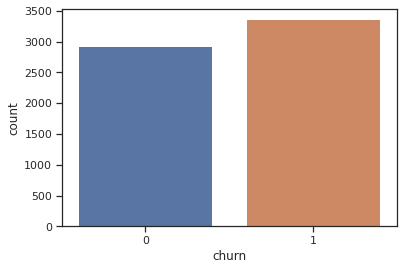

In [577]:
balanceadosmote = sns.countplot(x=y)

Após balancearmos nosso dataset, vamos criar nossos dataframes de treino e teste, que serão usados no nosso modelo (árvore).

In [578]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [579]:
dt = DecisionTreeClassifier(max_depth=3, random_state = 42)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print(y_pred[0:5])

[0 1 0 1 0]


Ás árvores são formadas a partir de hyperparâmetros, que podem ser, o tamanho de ramos, o tanto de quebra por folha, o tanto de feature por nó

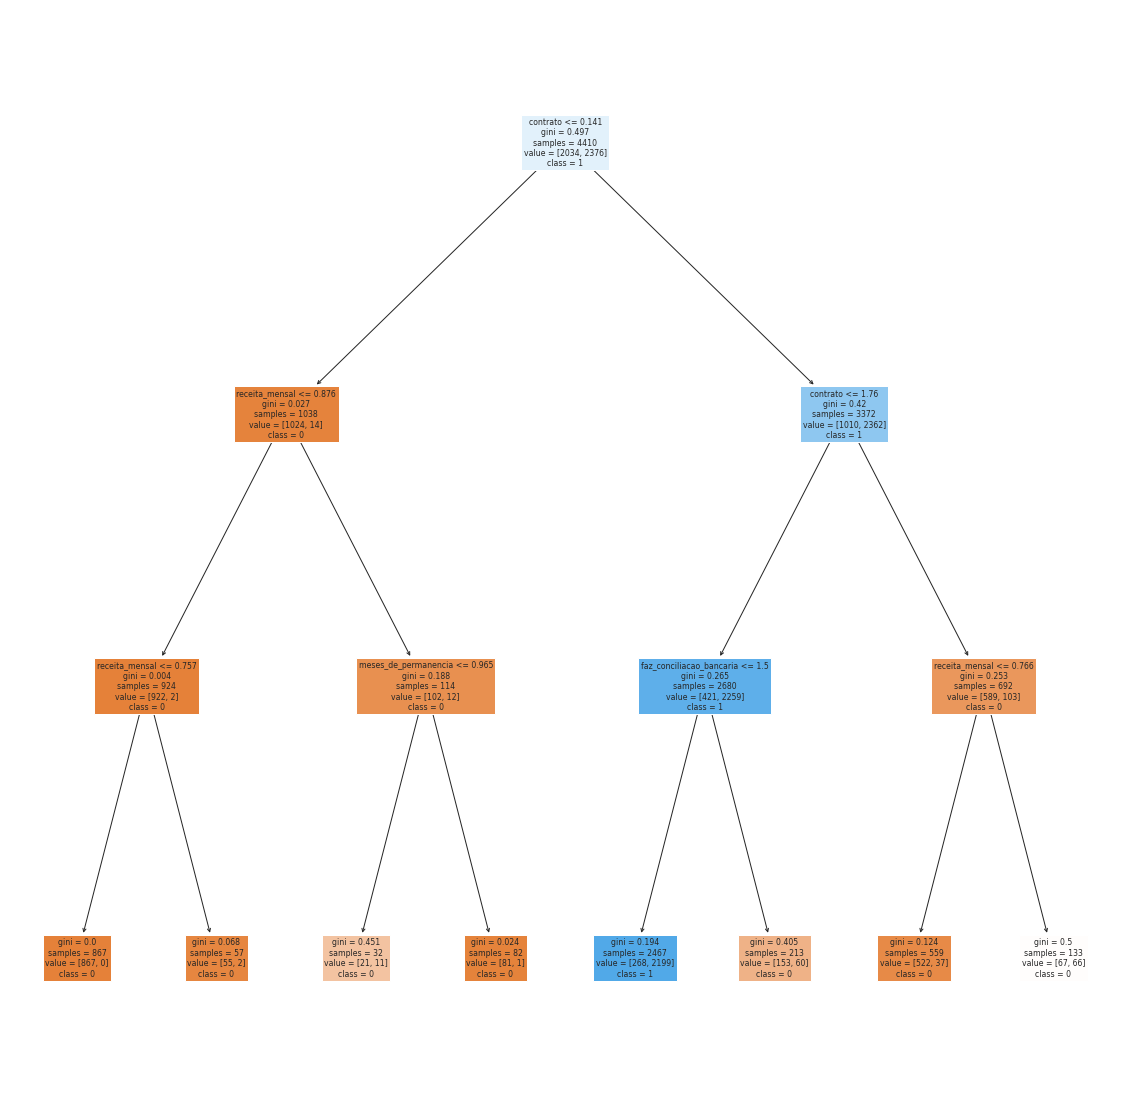

In [580]:
plt.figure(figsize=(20,20))
plot_tree(dt, 
          feature_names=X.columns,  
          class_names=["0","1"],
          filled=True)

plt.show()

####Interpretando a árvore ponto de vista negócios

Baseado em como funciona a árvore (satisfazendo condições); a gente consegue ter uma ideia de que, as empresas que tem contrato de curto prazo tendem a parar de usar os serviços mais do que as que tem contratos mais longos. 

Outro fator muito relevante, também já levantado na EDA, é que a renda mensal influencia no churn, se as empresas tiverem uma alta receita mensal, ela são mais propícia a cancelar os serviços. 

Empresas com contrato de curto prazo e que não fazem conciliação bancária também são mais propícias a cancelar.


#### Avaliação Arvore de Decisão

- Métricas
- Matriz de Confusão

In [581]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.85      0.87       900
           1       0.87      0.92      0.89       990

    accuracy                           0.88      1890
   macro avg       0.89      0.88      0.88      1890
weighted avg       0.89      0.88      0.88      1890



Como vemos acima na nossa geração de métricas, nosso modelo está com uma acurácia muito boa (88%). 

Podemos utilizar ela como métrica de avaliação do nosso modelo? Ele conseguiu classificar corretamente??

No caso do nosso modelo, que nós utilizamos um algoritmo de balanceamento (SMOTEEN), ela se torna uma boa métrica de avaliação.

Caso nossos dados estivessem desbalanceado, ela não seria uma boa métrica de avaliação, pois, com 88% dos acertos, ela nos traria uma falsa sensação de que o modelo está acertando, quando na verdade, ele está adivinhando erroneamente, já que a maioria dos nossos dados estariam mais para uma saída do que para a outra. 

De uma forma geral, cada métrica é uma relação matemática entre os dados de entrada e os dados adivinhados; então todas são importantes e nenhuma deve ser descartada.

Test set accuracy: 0.88 



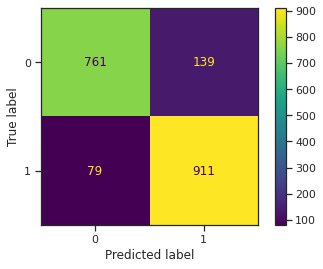

In [582]:
y_pred = dt.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f} \n".format(acc))

plot_confusion_matrix(dt, X_test, y_test)  
plt.show()



*   Verdadeiro Positivo (VP): falou que seria, e foi.  761 valores.
*   Verdadeiro Negativo (VN): falou que não seria, e não foi. 911 valores. 
*   Falso Positivo (FP): falou que seria, mas não foi. 139 valores.
*   Falso Negativo (FN): falou que não seria, mas foi. 79 valores.







##RECOMENDAÇÃO

Com base no que foi levantado, podemos recomendar que a empresa faça planos mais atrativos para modalidades contratuais mais longas (anual, trimestral), pois assim evita que as empresas assinem os planos de renovação mensal, que de acordo com nosso modelo, é um forte agravante para as empresas não permanecerem conosco.

----------

Também é fortemente recomendado que se crie um programa de serviços para médias e grandes empresas, pois ao que tudo indica, conforme a empresa cresce (aumenta a renda), ela tende a deixar de usar os nossos serviços, muito provável porque os mesmos não atendem mais as suas necessidades.

Com esses serviços podemos criar um vínculo de fidelidade; permitindo até campanhas de publicidade colocando casos de clientes que estão com a gente desde que eram apenas micro empresas, isso gera impacto.